### The first script "load_video_example.py" illustrates how the videos can be loaded using Python and how this is also done in the evaluation.

In [ ]:
#pip install imageio-ffmpeg

In [1]:
#Load the required packages:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt 

In [3]:
def load_video(path):
    # open a ffmpeg reader with dimensions 160x96 (video size) of the given path
    reader = iio.get_reader(path, 'ffmpeg', size=(160, 96))
    
    # only keep the one channel (they are all the same as the videos are greyscale) and convert to uint8 (ie, values in range 0-255). 
    return np.array([frame[:, :, 0] for frame in reader]).astype(np.uint8)

In [4]:
def write_video(path, arr):
    # open a ffmpeg writer
    writer = iio.get_writer(path, fps=30, format='ffmpeg')
    
    for im in arr:
        # add each frame from the passed array
        writer.append_data(im.astype(np.uint8))

    # close the file again 
    writer.close()

[[0 0 1 ... 3 3 3]
 [0 0 1 ... 3 3 3]
 [0 1 2 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]] (4793, 96, 160)


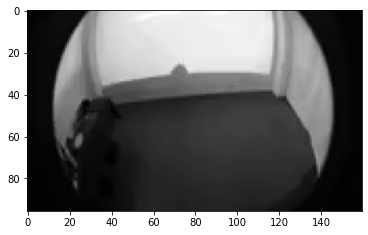

In [8]:
if __name__ == "__main__":
    # load a sample from the data
    video = load_video("./data/s037t01_video.mp4")
    
    # print first frame and shape of whole video
    # shape should be (4793 frames, 96 pixels, 160 pixels)
    print(video[0], video.shape)
    
    # plot and save first frame as test
    plt.imshow(video[0], cmap=plt.cm.gray)
    plt.savefig('example_load_video.png')
    
    # write example
    # writes a video with every 5th frame of the video we loaded earlier
    write_video("example_video.mp4", video[::5000])

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 1]
 [2 2 2 ... 2 2 1]
 [2 2 2 ... 2 2 1]] (4437, 96, 160)


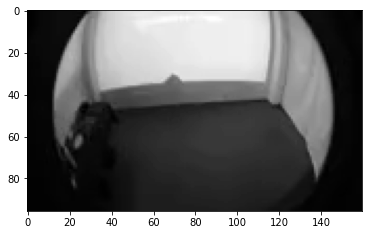

In [13]:
if __name__ == "__main__":
    # load a sample from the data
    video = load_video("./data/s037t02_video.mp4")
    
    # print first frame and shape of whole video
    # shape should be (4793 frames, 96 pixels, 160 pixels)
    print(video[500], video.shape)
    
    # plot and save first frame as test
    plt.imshow(video[0], cmap=plt.cm.gray)
    plt.savefig('example_load_video.png')
    
    # write example
    # writes a video with every 5th frame of the video we loaded earlier
    write_video("example_video.mp4", video[::500000])

### The second script "transform_data_to_csv.py" serves as a way to convert the file triples from info, motion capture and video into a CSV file. Please note that the script has an execution time of about 10 minutes and creates a folder "data-csv" with a size of 8GB.

In [13]:
import pandas as pd
import numpy as np
import imageio as iio
from glob import glob
import matplotlib.pyplot as plt
import os

In [14]:
def load_video(path):
    # open a ffmpeg reader with dimensions 160x96 (video size) of the given path
    reader = iio.get_reader(path, 'ffmpeg', size=(160, 96))
    # only keep the one channel (they are all the same) and convert to uint8 (ie, values in range 0-255). 
    return np.array([frame[:, :, 0] for frame in reader]).astype(np.uint8)

In [15]:
def load_csv(path):
    # load csv, no additional paramters required
    return pd.read_csv(path)


def load_triple(path):
    # load info
    info = load_csv(f"{path}_info.csv")

    # load mocap 
    mocap = load_csv(f"{path}_mocap.csv")
    
    # load video, flatten and put into dataframe
    # ie each frame is flattened into a 160*96 vector
    video = pd.DataFrame(load_video(f"{path}_video.mp4").reshape((-1, 160*96)), columns=[f"Pixel ({i},{j})" for i in range(96) for j in range(160)])
    
    # combine all three into one dataframe
    return pd.concat([info, mocap, video], axis=1)

In [16]:
# Print iterations progress
# Not much to see, borrowed from: https://stackoverflow.com/questions/3173320/text-progress-bar-in-terminal-with-block-characters
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

Progress: |██████████████████████████████████████████████████| 100.0% Complete


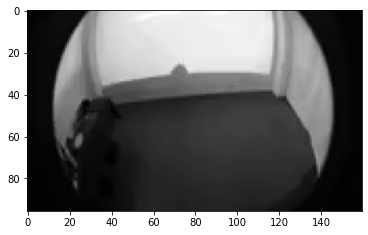

In [17]:
if __name__ == "__main__":
    
    ### Transform all data triplets into single csv files.
    # Be mindeful: 
    # - the full folder size is then 8gb
    # - this will take ~10min
    
    # find all file triplets
    data_names = sorted([x.split('_')[0] for x in glob('data/*.mp4')])
    l = len(data_names)
    
    # create a folder to store the csv in
    if not os.path.exists('data-csv/'):
        os.makedirs('data-csv/')
       
    # create progress bar
    printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

    # iterate over all triples
    for i, name in enumerate(data_names):
        # load a triple and write it out as csv
        # if you know what you are doing, you could also consider using compression="gzip"
        # see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
        load_triple(name).to_csv(f"{name.replace('data', 'data-csv')}.csv", index=False)
         
        
        # update progressbar
        printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
        
    
    ### Example loading a triple and saving the first frame as image
    # load the first data triple
    df = load_triple(data_names[0])
    
    # only keep the pixels
    video_pixels = df.loc[:, df.columns.str.startswith('Pixel')]
    
    # select the first frame and shape back into matrix
    initial_video_frame = video_pixels.loc[0].values.reshape(96, 160)
    
    # plot and save
    plt.imshow(initial_video_frame, cmap=plt.cm.gray)
    plt.savefig('example_video_from_csv.png')